In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
from getdist import plots, MCSamples, loadMCSamples
import classy as Class
import getdist
import pickle as pkl

######################################################
#  Setting up plots
######################################################

%config InlineBackend.figure_format = 'retina'
font = {'size'   : 16, 'family':'serif'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = [8.0,6.0]
plt.rcParams['text.usetex']=True

dirname = "/Users/gabe/projects/emulators/data/modrec/chains"
sample_path = os.path.join(dirname, "modrec")
s = loadMCSamples(sample_path, settings={'ignore_rows': 0.5})

/Users/gabe/projects/emulators/data/modrec/chains/modrec.8.txt
/Users/gabe/projects/emulators/data/modrec/chains/modrec.3.txt
/Users/gabe/projects/emulators/data/modrec/chains/modrec.2.txt
/Users/gabe/projects/emulators/data/modrec/chains/modrec.1.txt
/Users/gabe/projects/emulators/data/modrec/chains/modrec.5.txt
/Users/gabe/projects/emulators/data/modrec/chains/modrec.4.txt
/Users/gabe/projects/emulators/data/modrec/chains/modrec.6.txt
/Users/gabe/projects/emulators/data/modrec/chains/modrec.7.txt
Removed 0.5 as burn in


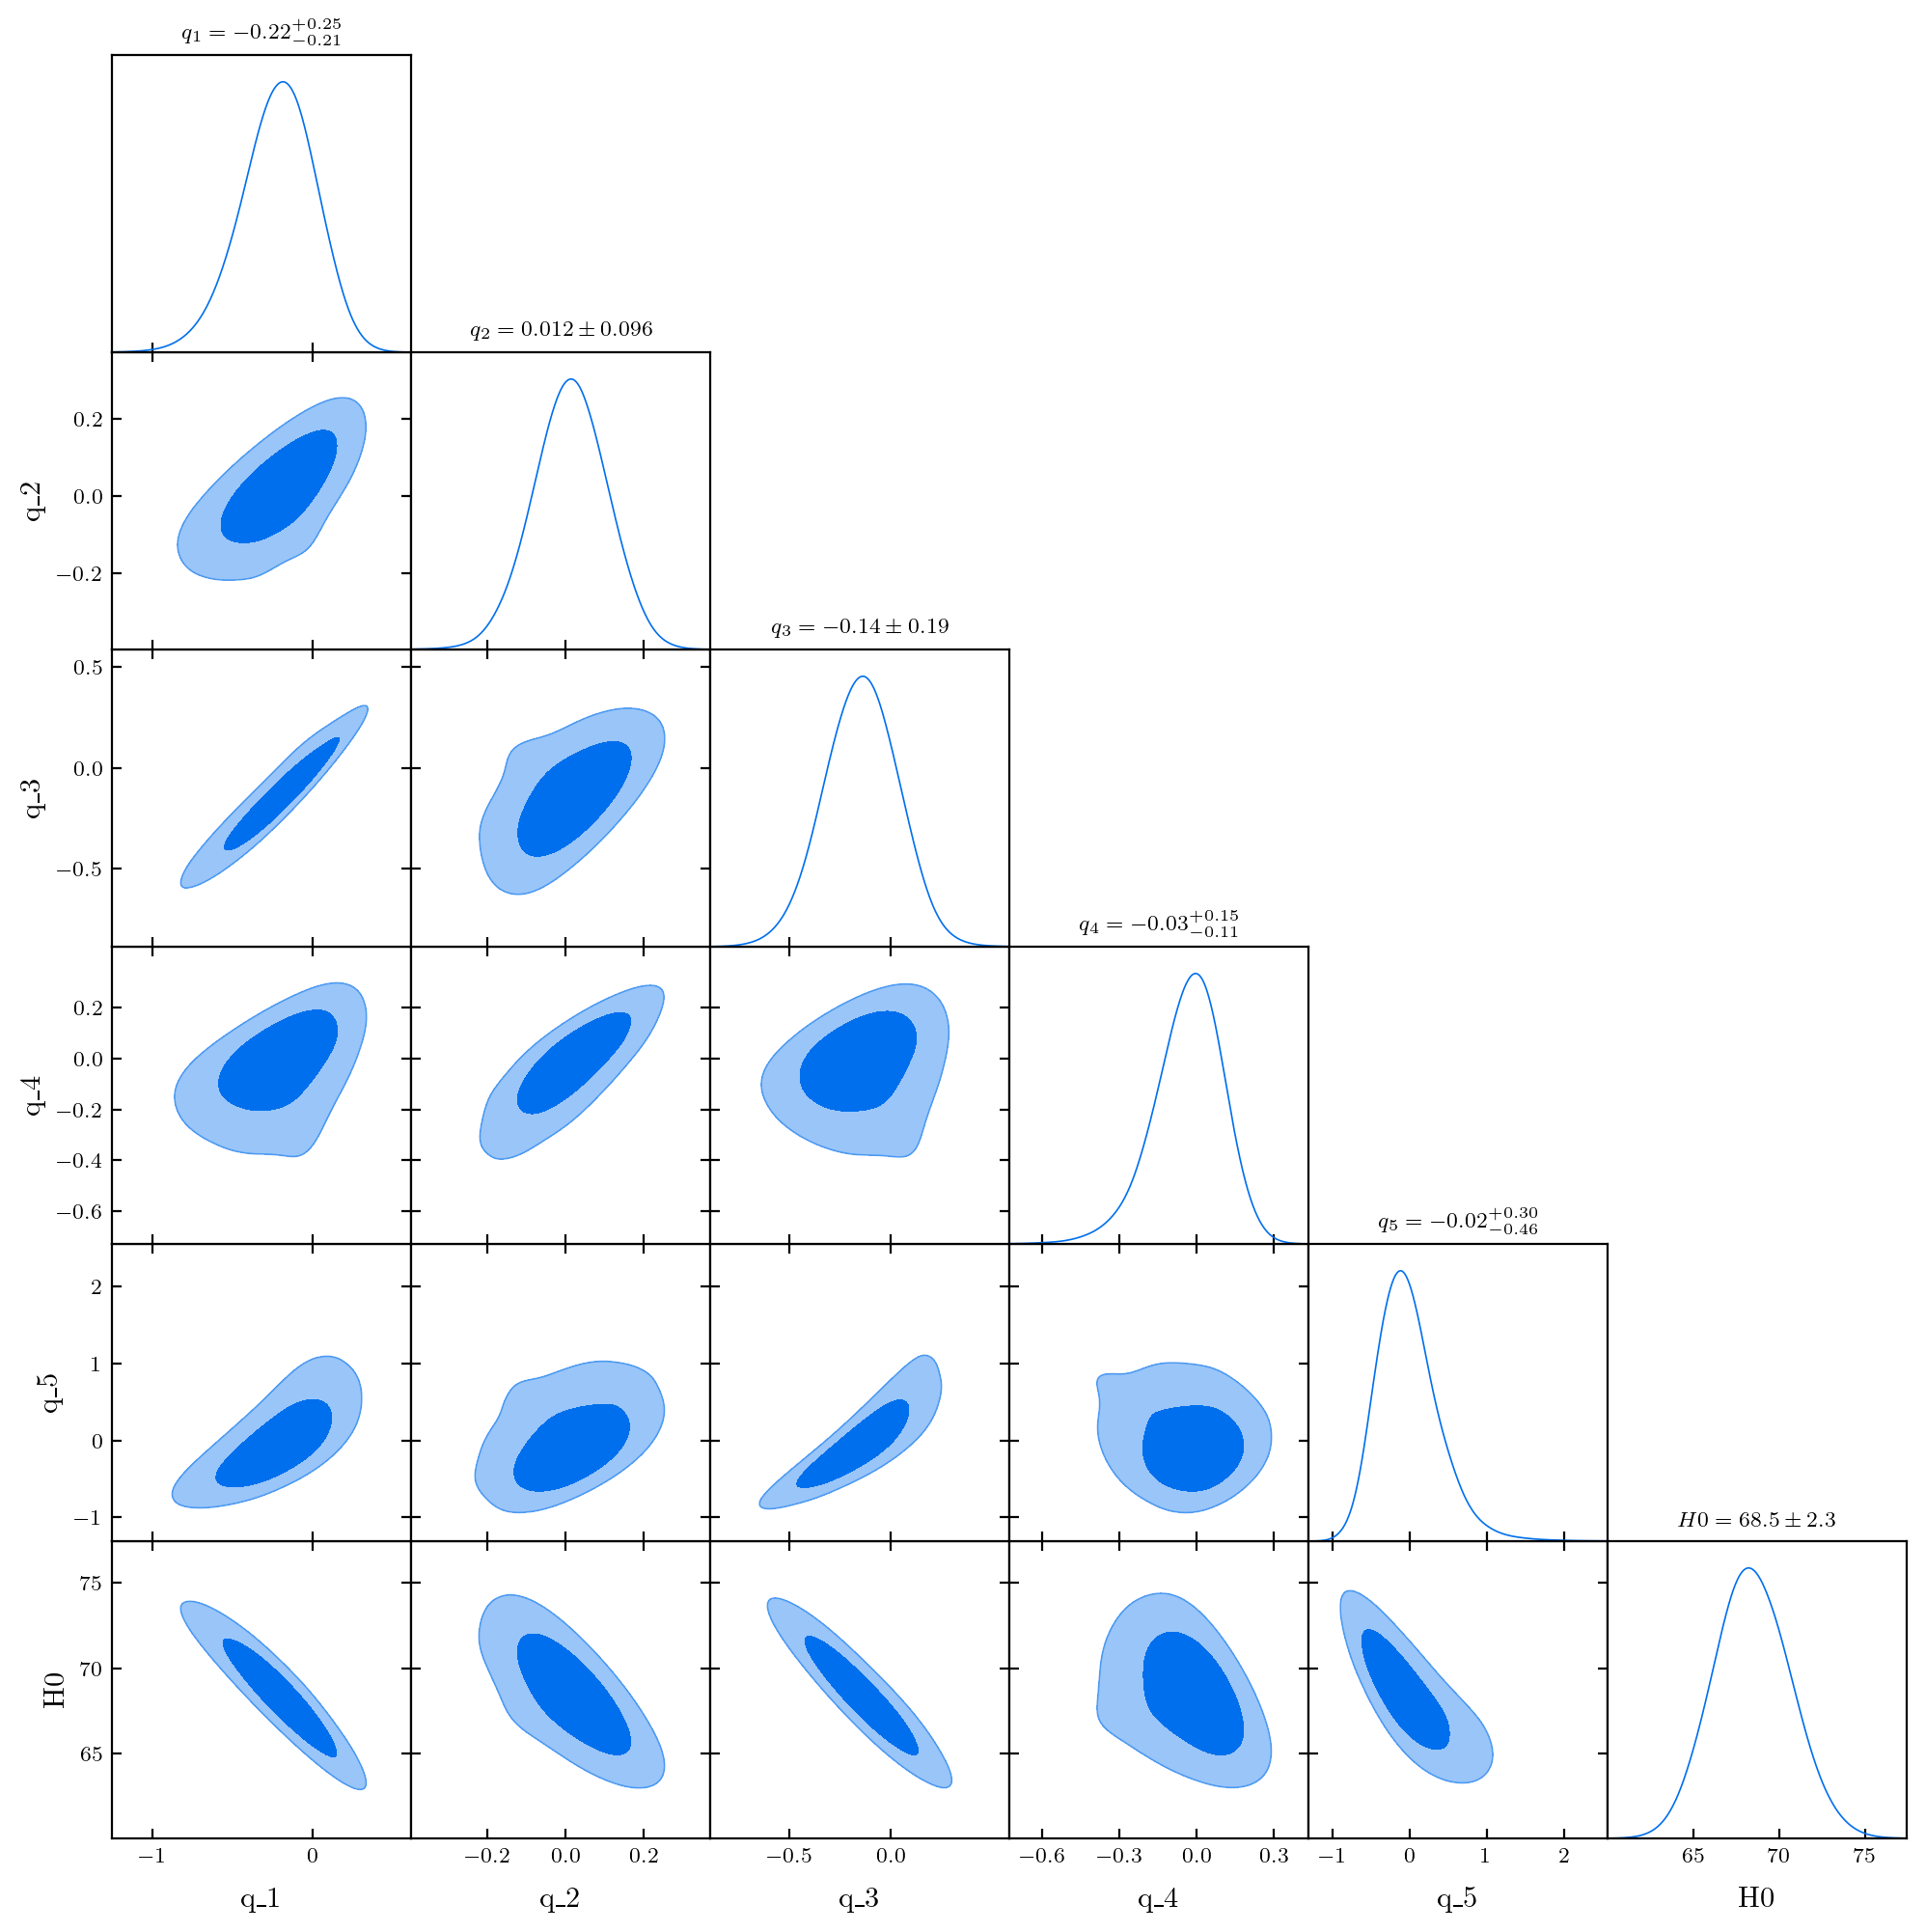

In [2]:
g = plots.get_subplot_plotter()
g.triangle_plot([s], ["q_1", "q_2", "q_3", "q_4", "q_5", "H0"], filled=True, title_limit=1)
#g.triangle_plot([s], ['omega_b', 'omega_cdm', 'n_s', 'tau_reio', 'logA', 'H0'], filled=True, title_limit=1)
#g.export(fname="../results/triangle_modrec_standard.pdf")

In [3]:
base_samples = np.split(s.samples,s.chain_offsets[1:-1])
base_chains = []

rename_dict = {}

with open("/Users/gabe/projects/emulators/data/modrec/chains/modrec.paramnames", "r") as f:
    lines = [l.strip() for l in f.readlines()]
    for i,name in enumerate(lines):
        rename_dict["param{}".format(i+1)] = name

for samp in base_samples:
    chain = MCSamples()
    print(len(samp))
    chain.loadChains(root="/Users/gabe/projects/emulators/data/modrec/chains/modrec", files_or_samples=samp)
    chain.setParamNames("/Users/gabe/projects/emulators/data/modrec/chains/modrec.paramnames")
    base_chains.append(chain)

505440
519129
508899
503010
522275
515957
518894
506000


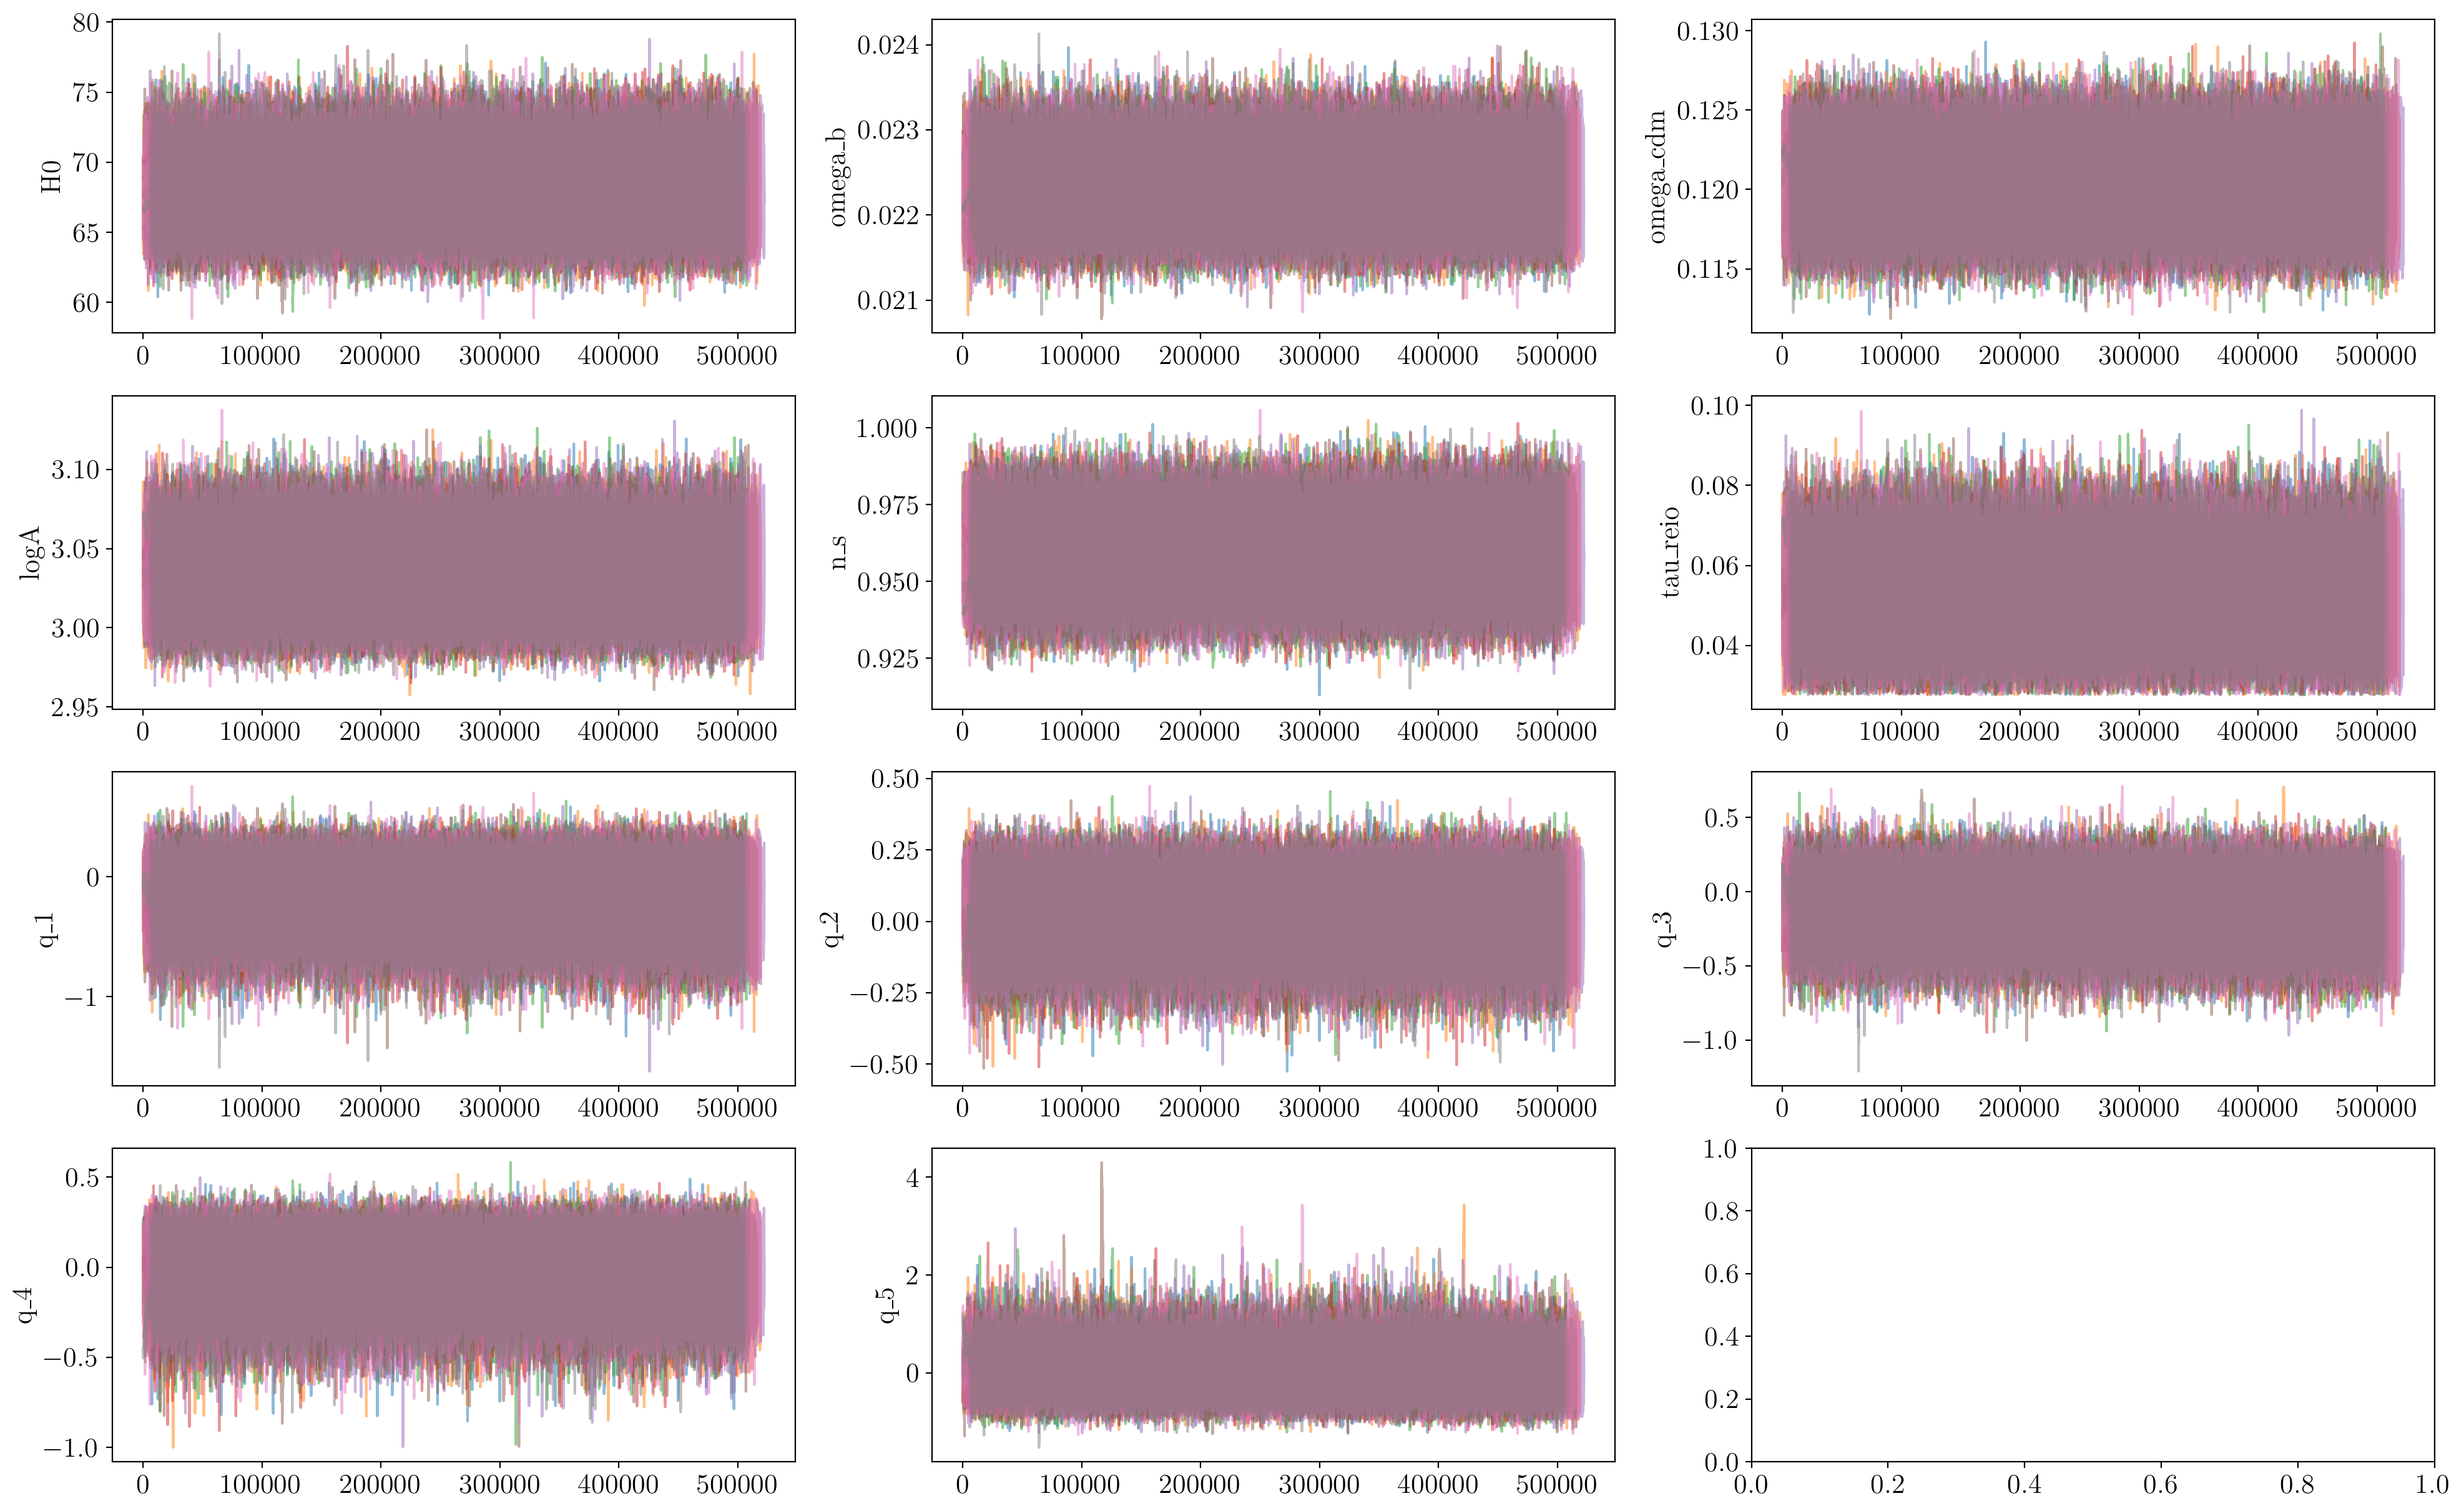

In [4]:
params_to_plot = ["H0", "omega_b", "omega_cdm", "logA", "n_s", "tau_reio", "q_1", "q_2", "q_3", "q_4", "q_5"]

fig,ax=plt.subplots(nrows=4, ncols=3, figsize = (24, 15))

for i,p in enumerate(params_to_plot):
    ax.flatten()[i].set_ylabel(p)
    for chain in base_chains:
        samples = chain.getParams().__dict__[p]
        ax.flatten()[i].plot(samples, alpha=0.5)
plt.savefig("../results/traceplot_modrec.png", dpi=300, bbox_inches="tight")